## pandas와 EDA

### 탐색적 데이터 분석 과정이란?  
- EDA (Exploratory Data Analysis) 라고 함
- 데이터 분석을 위해 **raw data를 다양한 각도에서 관찰**하여, 데이터를 이해하는 과정
- 주제마다 EDA를 통해 진행하는 과정은 다양한 방법이 동원된다.
- 분석 프로세스가 정형화된 패턴이 없다.
<br>
       
> 존 튜키라는 미국 통계학자가 제안한 분석 방법론 <br>
> 기존 통계학이 가설을 세우고, 가설을 검정하는 방법론 <br>
> 본연의 데이터 탐색에 집중하자는 방법론

**3단계 과정을 통해서 익혀본다.**

1. 데이터의 출처와 주제에 대해 이해
2. 데이터의 크기 확인
3. 데이터 구성 요소(feature)의 속성(특징) 확인
   - feature: 데이터 구성 요소를 위미함
   - 판다스의 column 이라고 봐도 무방함
       


### 실제 코로나 데이터로 pandas 라이브러리와 탐색적 분석 과정 익히기
- COVID-19-master 폴더 확인
  - 데이터 다운로드: https://github.com/CSSEGISandData/COVID-19
  - 데이터 압축 풀고 COVID-19-master 폴더를 통째로 pandas_eda 주피터 노트북이 있는 폴더 안에 하위폴더로 이동
  
- 한국통계청
    -https://kosis.kr/covid/covid_index.do

## 탐색적 데이터 분석1: 데이터의 출처와 주제에 대해 이해

<div class="alert alert-block" style="border: 1px solid #566573;background-color:#EAF2F8;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석: 1. 데이터의 출처와 주제에 대해 이해</font><br>

- 국가별 코로나 바이러스 daily 현황 자료
- 데이터 소스는 https://github.com/CSSEGISandData/COVID-19/tree/master/who_covid_19_situation_reports
  - 실제 데이터 분석에서는 raw data를 어떻게 가져왔는지에 대해서도 세세히 알 필요가 있을 때가 있음
- PDF로 만들어진 공식 문서에서 추출한 데이터와
- 공식 웹페이지를 크롤링해서 얻은 자료를 CSV 파일로 생성
</div>

## 탐색적 데이터 분석2: 데이터의 크기와 모양을 확인

<div class="alert alert-block" style="border: 1px solid #566573;background-color:#EAF2F8;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석: 2. 데이터의 크기와 모양을 확인</font><br>

- 1.pandas로 파일 읽기
- 2.pd.head(): 실제 앞 데이터 살펴봄
- 3.pd.tail(): 실제 끝 데이터 살펴봄
- 4.pd.shape: 데이터 전체 모양 확인(행은 몇개고, 열은 몇개인지)
- 5.pd.info():데이터 정보 확인(컬럼 구성과 타입, 행 갯수 등.)
    - => 결측값 유무 확인
</div>

### pandas 라이브러리로 csv 파일 읽기
- csv 파일을 pandas dataframe 으로 읽기 위해 read_csv() 함수를 사용함
- csv 구분자는 sep=구분자 옵션을 넣어서 구분자가 다른 경우도 읽기 가능

```python
doc = pd.read_csv("파일명", encoding='utf-8-sig', sep=',')
```

- 에러 나는 데이터는 항상 있을 수 있음, 해당 데이터는 생략하는 것이 일반적임

```python
doc = pd.read_csv("파일명", encoding='utf-8-sig', error_bad_lines=False)
```

In [1]:
import pandas as pd
doc = pd.read_csv("COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv", encoding='utf-8-sig')

#### 참고: pandas 라이브러리로 엑셀 파일 읽기

- 엑셀 데이터 읽기 (맨 앞에 있는 쉬트의 데이터를 읽음)

```
pd.read_excel("파일명")
```

- 특정 쉬트 데이터 읽기: sheet_name 옵션 사용해서, 엑셀 파일의 특정 쉬트를 명시적으로 지정 가능

```
pd.read_excel(파일명, sheet_name=쉬트명)
```

<div class="alert alert-block" style="border: 1px solid #566573;background-color:#EAF2F8;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석: 2. 데이터의 크기 확인</font><br>
</div>

### 데이터를 pandas로 읽은 후, 가장 먼저 하는 일

- 데이터 일부 확인하기
  - head(): 처음 5개(디폴트)의 데이터 확인하기
    - head(n=10): 처음 10개(조정 가능)의 데이터 확인하기 
  - tail(): 마지막 5개의 데이터 확인하기
    - tail(n=10): 마지막 10개(조정 가능)의 데이터 확인하기 

In [ ]:
doc.head()

In [ ]:
doc.tail()

### 보다 다양한 데이터 정보 확인하기
- shape: 데이터의 row, column 사이즈 확인
- info(): column별 데이터 타입과 실제 데이터가 있는 사이즈 확인
  - raw data는 일부 데이터가 없는 경우가 많기 때문에, 실제 데이터의 사이즈 확인이 필요함

In [3]:
# 사이즈는?
doc.shape

(2483, 12)

In [4]:
# 누락된 데이터 갯수
# 데이터 Dtype
# 컬럼의 갯수 이름 정보 파악
doc.isna().sum()

FIPS              312
Admin2            262
Province_State    176
Country_Region      0
Last_Update         0
Lat                 1
Long_               1
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64

## 탐색적 데이터 분석3: 데이터 구성 요소(feature) 특징 확인

<div class="alert alert-block" style="border: 1px solid #566573;background-color:#EAF2F8;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석: 3. 데이터 구성 요소(feature)의 특징 확인</font><br>

- 1.각 column 이해하기(각 column은 무엇을 의미하는가?)
- 2.column값이 숫자이면 평균, 표준편차, 최소/최대값 확인
- 3.column간의 상관관계를 확인

</div>

### 각 column 이해하기
- raw data에는 다양한 column 이 있는 경우가 많고, 이 중에서 내가 사용할 column 에 대해서는 확실히 이해하고 있어야 함
- FIPS:
- Admin2:
- Province_State: 
- Country_Region: 
- Last_Update: 
- Lat/Long: 
- Confirmed: 
- Deaths: 
- Recovered: 
- Active: 
- Combined_Key: 

### 속성이 숫자라면, 평균, 표준편차, 4분위 수, 최소/최대값 확인하기
- describe(): 숫자 데이터의 기본 통계치를 한번에 확인할 수 있음

In [ ]:
# count: 갯수, mean: 평균, std: 표준편차, min: 최소값, max: 최대값
# 25%/50%/75%: 4분위수로 전체 데이터 중, 25%/50%/75% 각각에 해당하는 수치가 몇 인지를 알려줌

### 속성간 상관관계 이해하기
- corr(method=상관계수): 각 속성간 상관 관계 확인하기 (피어슨 상관계수가 디폴트임) 
- 해석요령
    * 0 ~ 0.3 : 약
    * 0.3 ~ 0.6(0.7): 중
    * 0.6(0.7) ~ 1: 강
  
> 참고: 피어슨 상관계수 관계   <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Correlation_coefficient.png/600px-Correlation_coefficient.png">
> 출처: [위키피디아]( https://ko.wikipedia.org/wiki/%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98)

In [5]:
doc.corr()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
FIPS,1.000000,0.144217,0.139813,0.003306,-0.000190,NaN,NaN
Lat,0.144217,1.000000,-0.487517,0.028217,0.021578,-0.004630,0.029301
Long_,0.139813,-0.487517,1.000000,0.157110,0.104027,0.155989,0.143738
Confirmed,0.003306,0.028217,0.157110,1.000000,0.886551,0.727257,0.913162
Deaths,-0.000190,0.021578,0.104027,0.886551,1.000000,0.567840,0.880624
Recovered,NaN,-0.004630,0.155989,0.727257,0.567840,1.000000,0.493139
Active,NaN,0.029301,0.143738,0.913162,0.880624,0.493139,1.000000


## 시각화를 통한 데이터 분석 강화
- 데이터를 보다 깊게 이해하기 위해, 데이터를 시각화가 도움
- 초기 데이터 분석에 도움이 되는 시각화 라이브러리 필요

### matplotlib / seaborn

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

### 화면에 표시될 그래프 사이즈 조정

In [ ]:
plt.figure(figsize=(5,5))

#### 화면에 표시될 그래프 사이즈 조정

```python
sns.heatmap(data = doc.corr(), annot=True, fmt = '.2f', linewidths=0.5, cmap='Blues')
```

- data=테이블형: 데이터셋(데이터프레임)
- annot=True: 박스 안에 값 표시
- fmt='0.2f': 박스 안에 표시될 값의 표시 형식 설정 (0.2f 는 소숫점 두자릿수를 의미함)
- linewidths=0.5: 박스와 박스 사이의 간격 설정
- cmap='Blues': 색상 선택 (https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
doc = pd.read_csv("COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv", encoding='utf-8-sig')

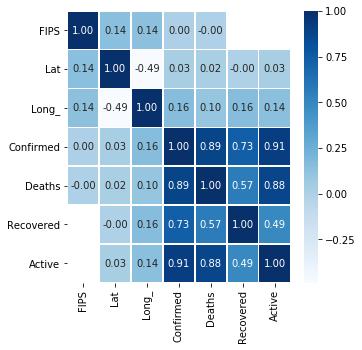

In [7]:
plt.figure(figsize=(5,5))
sns.heatmap(data = doc.corr(), annot=True, fmt = '.2f', linewidths=0.5, cmap='Blues')

### 이전 데이터 시각화 라이브러리 (참고로만 이해)
- matplotlib: 파이썬에서 가장 기본적으로 사용하는 자료를 그래프로 보여주는 시각화 라이브러리
  - 가장 좋기 때문에, 많이 사용된 것이 아니라, 이전부터 사용해왔기 때문에 사용된다고 하는 편이 맞음
- seaborn: matplotlib을 기반으로 다양한 통계 차트 및 색상 테마를 추가한 라이브러리
  - matplotlib 라이브러리로만은 이쁘지 않았고, 다양한 차트에 대한 요구가 많아서 개발된 라이브러리
  
### 최신 시각화 라이브러리: plotly
  - pandas 기능과 plotly 를 조합해서 최신/가장 빠르게 시각화 가능
  - pandas 데이터프레임.iplot() 같은 형태로 데이터프레임을 바로 그래프로 그릴 수 있음
  - https://plotly.com/python/
  
  
> 본 전처리에서는 이전 데이터 시각화 라이브러리를 간략히 시각화가 분석에 유용하다는 점만 알려드리고, <br>
> 이전 시각화 라이브러리에 대해 가볍게만 이해할 수 있도록 꾸몄습니다. <br>
> 데이터 분석에서 시각화를 본격적으로 이해할 시에는 최신 시각화 라이브러리를 사용합니다.